<a href="https://colab.research.google.com/github/AkashDas-AD/Credit-Card-Fraud-Detection/blob/main/Creditcard_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Card Fraud Detection**
Dataset has been tanken from kaggle
Link : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download





In [56]:
# import library files

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [57]:
# load dataset
df = pd.read_csv('creditcard.csv')

In [58]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [59]:
df.shape

(284807, 31)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [61]:
#check null values
null_values = df.isnull().sum()

In [62]:
null_values

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [63]:
#dropping null values
df = df.dropna()

In [64]:
# Feature scaling in amount columns
sc = StandardScaler()
df['Amount']=sc.fit_transform(pd.DataFrame(df['Amount']))

In [65]:
df = df.drop(['Time'],axis=1)

In [66]:
df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [67]:
df.duplicated().sum()

9144

In [68]:
#droping duplicates
df = df.drop_duplicates()

In [69]:
df.shape

(275663, 30)

In [70]:
var=df['Class'].value_counts()

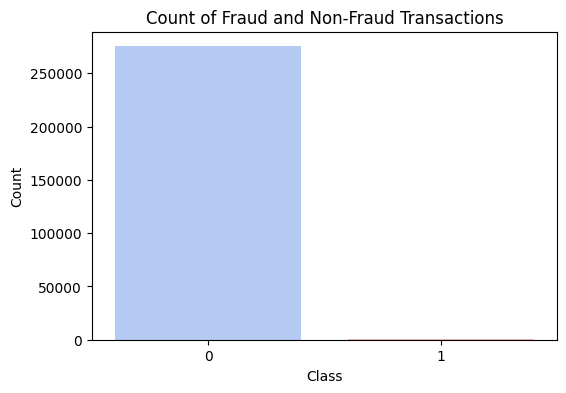

In [71]:
# vizualize fardulaent and non-fraudlent data
plt.figure(figsize=(6, 4))
sns.barplot(x=var.index, y=var.values, palette='coolwarm')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Fraud and Non-Fraud Transactions')
plt.show()

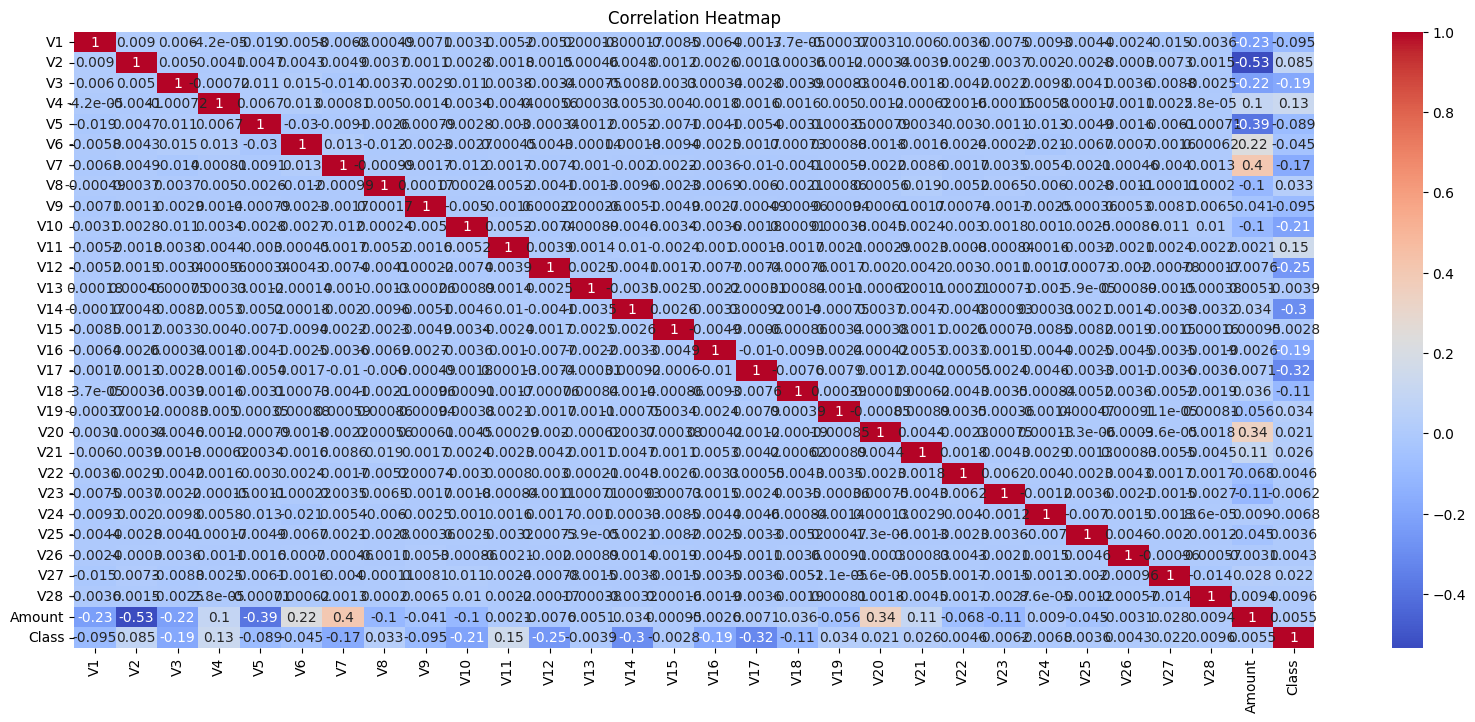

In [72]:
# Plot heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [73]:
# setting features and target

X = df.drop('Class',axis=1)
y = df['Class']

In [74]:
# splitting dataset into training and test dataset

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [75]:
# Handling imbalancing dataset
# Undersampling

normal = df[df['Class']==0]
fraud = df[df['Class']==1]

In [76]:
normal.shape

(275190, 30)

In [77]:
fraud.shape

(473, 30)

In [78]:
# There are in total 473 fraud transaction, so take 473 normal transactions
normal_sample=normal.sample(n=473)

In [79]:
normal_sample.shape

(473, 30)

In [80]:
#merging the 2 dataset
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [81]:
new_data['Class'].value_counts()

,count
Class,
0,473
1,473


In [82]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [83]:
# setting features and target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [84]:
def evaluate_model(y_test, y_pred):
    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the results
    print(f'Accuracy Score: {accuracy:.4f}')
    print(f'Precision Score: {precision:.4f}')
    print(f'Recall Score: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

In [85]:
#ML model : Logistic Regression

log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [86]:
y_pred1 = log.predict(X_test)

In [87]:
evaluate_model(y_test,y_pred1)

Accuracy Score: 0.9474
Precision Score: 0.9894
Recall Score: 0.9118
F1 Score: 0.9490


In [88]:
#ML model : Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [89]:
y_pred2 = dt.predict(X_test)

In [90]:
evaluate_model(y_test,y_pred2)

Accuracy Score: 0.9421
Precision Score: 0.9596
Recall Score: 0.9314
F1 Score: 0.9453


In [91]:
#ML model: Random Forest

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [92]:
y_pred3 = rf.predict(X_test)

In [93]:
evaluate_model(y_test,y_pred3)

Accuracy Score: 0.9474
Precision Score: 1.0000
Recall Score: 0.9020
F1 Score: 0.9485


In [94]:
final_data1 = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

final_data1

,Models,ACC
0,LR,94.736842
1,DT,94.210526
2,RF,94.736842


In [95]:
#Oversampling

# setting features and target
X = df.drop('Class',axis=1)
y = df['Class']

In [96]:
X.shape , y.shape

((275663, 29), (275663,))

In [97]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [98]:
y_res.value_counts()

,count
Class,
0,275190
1,275190


In [99]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

In [100]:
# ML model 1 -Logistic Regression

log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [101]:
y_pred4 = log.predict(X_test)

In [102]:
evaluate_model(y_test,y_pred4)

Accuracy Score: 0.9449
Precision Score: 0.9730
Recall Score: 0.9150
F1 Score: 0.9431


In [103]:
# Ml model 2 - Decision Tree

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [104]:
y_pred5 = dt.predict(X_test)

In [105]:
evaluate_model(y_test,y_pred5)

Accuracy Score: 0.9980
Precision Score: 0.9971
Recall Score: 0.9989
F1 Score: 0.9980


In [106]:
# ML model 3 - Random Forest

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [107]:
y_pred6 = rf.predict(X_test)

In [108]:
evaluate_model(y_test,y_pred6)

Accuracy Score: 0.9999
Precision Score: 0.9998
Recall Score: 1.0000
F1 Score: 0.9999


In [109]:
final_data2 = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred4)*100,
                     accuracy_score(y_test,y_pred5)*100,
                     accuracy_score(y_test,y_pred6)*100
                    ]})
final_data2

,Models,ACC
0,LR,94.485628
1,DT,99.800138
2,RF,99.991824


In [110]:
#Save the model on the entire dataset after oversampling.

rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)



RandomForestClassifier()

In [111]:
import joblib
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [112]:
model = joblib.load("credit_card_model")
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation


**Conclusion:**

Random Forest (RF) is the most effective model based on your results, especially with oversampling, achieving the highest accuracy (99.99%). It would likely generalize well and capture the minority class better in an imbalanced dataset.

Decision Tree (DT) is a close second and performs very well, but Random Forest should be preferred for better generalization.
*italicized text*
Logistic Regression (LR) shows good performance with undersampling but struggles with oversampling, so it might not be the best choice for highly imbalanced data in this case.